In [50]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [51]:
import glob
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import scipy.io as sio
import biosppy 
from statsmodels.tsa.stattools import adfuller

Visualizacion de la implementacion de frecuencias de muestreo no muy por encima a la minima permitida (160*2), acorde al teorema de Nyquist 

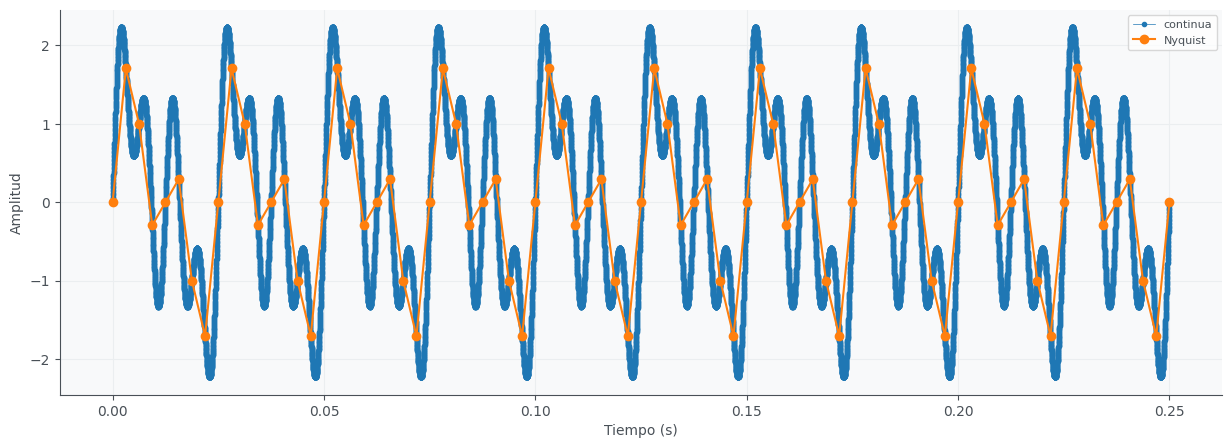

numero de muestras en 10 ciclos, es: 80.0
periodo señal: 0.025
periodo de muestreo: 0.003125


In [52]:
A=1

Fo = math.gcd(40,80,160) # Frecuencia fundamental de la señal

Tp = 1/Fo # Periodo de la señal

Fs = 100000 # frecuencia alta suministrada para comparativa con aparente continuo
Fs2 = 160*2 # Frecuencia de muestreo basandonos del teorema de Nyquist

T = 1/Fs  # Periodo de muestreo ("continua")
T2 = 1/Fs2 # Periodo de muestreo (Nyquist)
nc=int(input("ingrese el numero de ciclos que desea: "))

t = np.arange(0, (nc*Tp)+T, T) # Tiempo para nc ciclos de la señal aparentemente continua
t2 = np.arange(0, (nc*Tp)+T2, T2)  # Tiempo para nc ciclos de la señal con duración de Tp más una muestra T (señal Nyquist)

#inicializacion suma de sinusoides
x=0
xx=0
# suma de sinusoidales
for i in [40,80,160]:
    xi = A*np.sin(2*np.pi*i*t)
    xii = A*np.sin(2*np.pi*i*t2)
    x+=xi
    xx+=xii
    
#x = A*np.sin(2*np.pi*40*t)+A*np.sin(2*np.pi*80*t)+A*np.sin(2*np.pi*160*t)
#xx = A*np.sin(2*np.pi*40*t2)+A*np.sin(2*np.pi*80*t2)+A*np.sin(2*np.pi*160*t2)
plt.figure(figsize=(15,5))
plt.plot(t, x,marker=".",label="continua",linewidth=0.5)
plt.plot(t2, xx, marker='o',label="Nyquist")

plt.xlabel('Tiempo (s)')

plt.ylabel('Amplitud')

plt.legend()
plt.show()
 
print("numero de muestras en "+str(nc)+" ciclos"+", es: "+str((nc*Tp)/T2))
print("periodo señal: "+ str(Tp))
print("periodo de muestreo: "+ str(T2))

Debido que la aplicacion de frecuencias de muestreo no muy altas puede perjudicar la resolucion de frecuencias de la FFT, se procede a seleccionar una particularmnete alta, para evitar este tipo de inconvenientes 

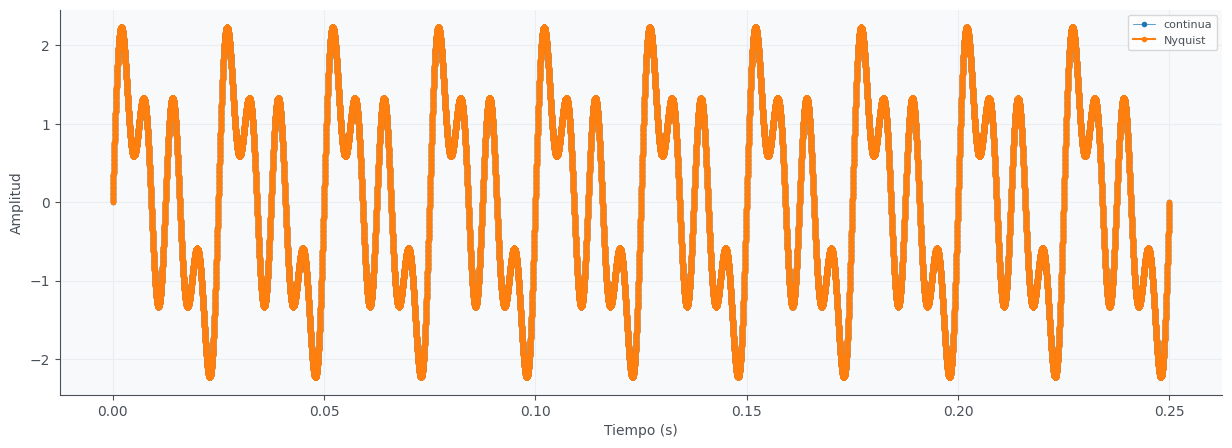

numero de muestras en 10 ciclos, es: 40000.0
periodo señal: 0.025
periodo de muestreo: 6.25e-06


In [53]:
A=1

Fo = math.gcd(40,80,160) # Frecuencia fundamental de la señal

Tp = 1/Fo # Periodo de la señal

Fs = 100000 # frecuencia alta suministrada para comparativa con aparente continuo
Fs2 = 160000 # Frecuencia de muestreo basandonos del teorema de Nyquist

T = 1/Fs  # Periodo de muestreo ("continua")
T2 = 1/Fs2 # Periodo de muestreo (Nyquist)
nc=int(input("ingrese el numero de ciclos que desea: "))

t = np.arange(0, (nc*Tp)+T, T) # Tiempo para nc ciclos de la señal aparentemente continua
t2 = np.arange(0, (nc*Tp)+T2, T2)  # Tiempo para nc ciclos de la señal con duración de Tp más una muestra T (señal Nyquist)

#inicializacion suma de sinusoides
x=0
xx=0
# suma de sinusoidales
for i in [40,80,160]:
    xi = A*np.sin(2*np.pi*i*t)
    xii = A*np.sin(2*np.pi*i*t2)
    x+=xi
    xx+=xii
    
#x = A*np.sin(2*np.pi*40*t)+A*np.sin(2*np.pi*80*t)+A*np.sin(2*np.pi*160*t)
#xx = A*np.sin(2*np.pi*40*t2)+A*np.sin(2*np.pi*80*t2)+A*np.sin(2*np.pi*160*t2)
plt.figure(figsize=(15,5))
plt.plot(t, x,marker=".",label="continua",linewidth=0.5)
plt.plot(t2, xx, marker='.',label="Nyquist")

plt.xlabel('Tiempo (s)')

plt.ylabel('Amplitud')

plt.legend()
plt.show()
 
print("numero de muestras en "+str(nc)+" ciclos"+", es: "+str((nc*Tp)/T2))
print("periodo señal: "+ str(Tp))
print("periodo de muestreo: "+ str(T2))

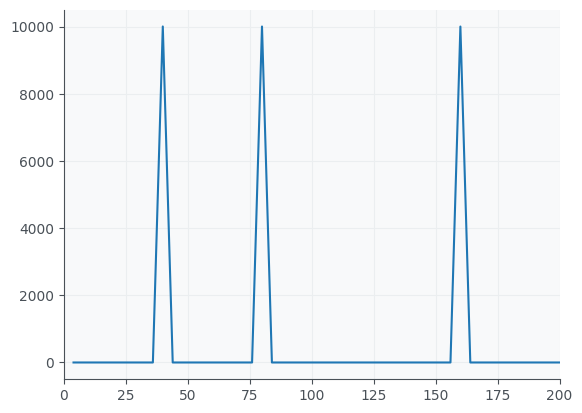

In [54]:
n=len(t2)
#print(n)
fhat=np.fft.fft(xx,n)
#print(fhat)
PSD=((np.absolute(fhat))**2)/n
#print(PSD)
freq=(1/(T2*n))*np.arange(n)
#print(freq)
L=np.arange(1,np.floor(n/2),dtype="int")
#print(L)
plt.plot(freq[L],PSD[L])
plt.xlim(0,200)
plt.show()


In [55]:
print(fhat[1]*np.conj(fhat[1]))

(0.03102756945711786+0j)


In [56]:
((np.absolute(fhat))**2)

array([2.69879341e-26, 3.10275695e-02, 1.29210759e-01, ...,
       3.11956932e-01, 1.29210759e-01, 3.10275695e-02])

In [57]:
np.arange(n)

array([    0,     1,     2, ..., 39998, 39999, 40000])

In [58]:
len(t2)

40001

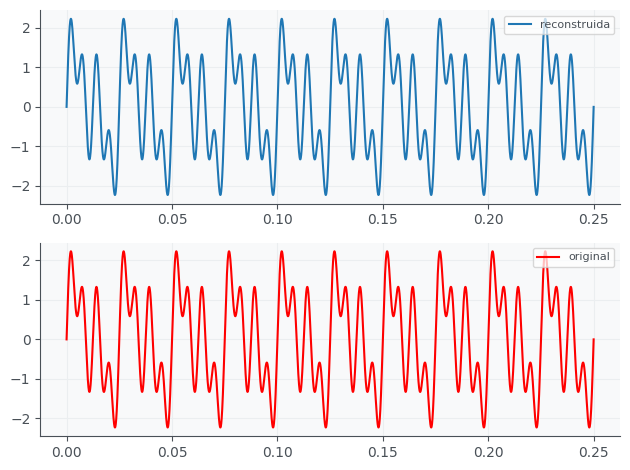

In [59]:
ffilt=np.fft.ifft(fhat)
n_rows = 2
n_cols = 1
fig, axes = plt.subplots(n_rows, n_cols)

ax = axes[0]
ax.plot(t2,ffilt,label="reconstruida")
ax.legend()
        
ax1 = axes[1]
ax1.plot(t2,xx,label="original",color="red")
ax1.legend()

fig.tight_layout()
plt.show()

In [60]:
len(PSD[L])

19999

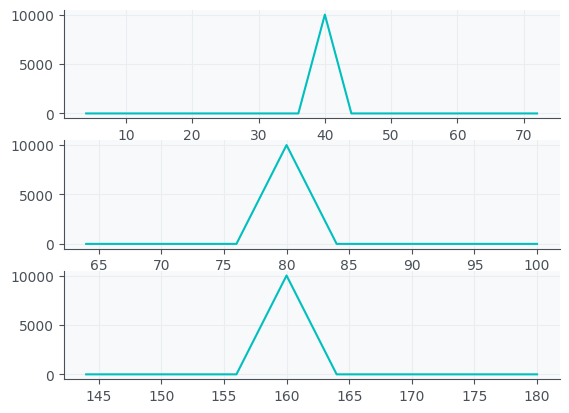

In [61]:
plt.subplot(3,1,1)
plt.plot(freq[L[0:18]],PSD[L[0:18]],color="c")
plt.subplot(3,1,2)
plt.plot(freq[L[15:25]],PSD[L[15:25]],color="c")
plt.subplot(3,1,3)
plt.plot(freq[L[35:45]],PSD[L[35:45]],color="c")
plt.show()

In [62]:
print(len(fhat))
print(len(PSD[L]))
print(len(t2))

40001
19999
40001


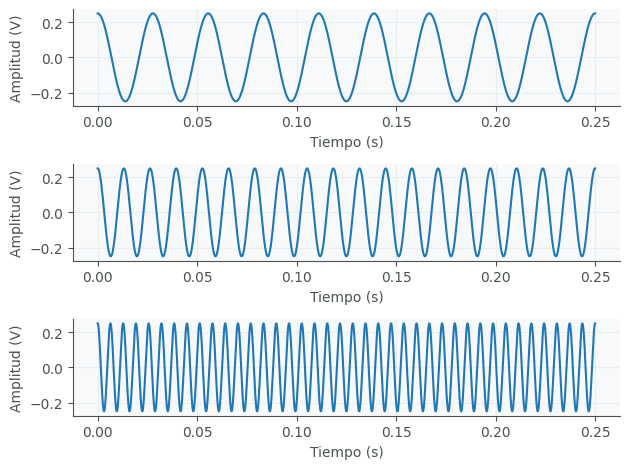

In [90]:
F1 = PSD[L]
F2 = np.zeros((len(fhat)))
F2[0:18] = F1[0:18]
#print(F2)
xr = np.fft.ifft(F2)
F2 = np.zeros((len(fhat)))
F2[15:25] = F1[15:25]
#print(F2)
xr_2 = np.fft.ifft(F2)
F2 = np.zeros((len(fhat)))
F2[35:45] = F1[35:45]
#print(F2)
xr_3 = np.fft.ifft(F2)

fig = plt.figure()
ax = fig.add_subplot(3,1,1)
ax.plot( t2,np.real(xr))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)')
ax2 = fig.add_subplot(3,1,2)
ax2.plot( t2,np.real(xr_2))
ax2.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)')
ax3 = fig.add_subplot(3,1,3)
ax3.plot( t2,np.real(xr_3))
ax3.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)')
fig.tight_layout()
plt.show()

Numeral 4.5

In [65]:
import scipy.io as sio

In [66]:

# Se carga el archivo Matlab con el "loadmat"
inf_señales= sio.loadmat('senecg (1).mat')
inf_señales.keys()

# Se extraen las señales de interés de ECG
ECG = inf_señales['ECG']
#ECG_filtered = inf_señales['ECG_filtered']

# Se obtiene el número de datos de la señal
a=len(np.squeeze(ECG))
#print(ECG)
print(a)

#Se divide la cantidad de datos sobre la frecuencia, para obtener el tiempo
time=int(a/250)
#print(time)

#El vector de tiempo es v, se toma 1/250 que es el periodo.
vector_tiempo=np.arange(0,time,1/250)
print(len(vector_tiempo))

1250
1250


Text(0, 0.5, 'Amplitud')

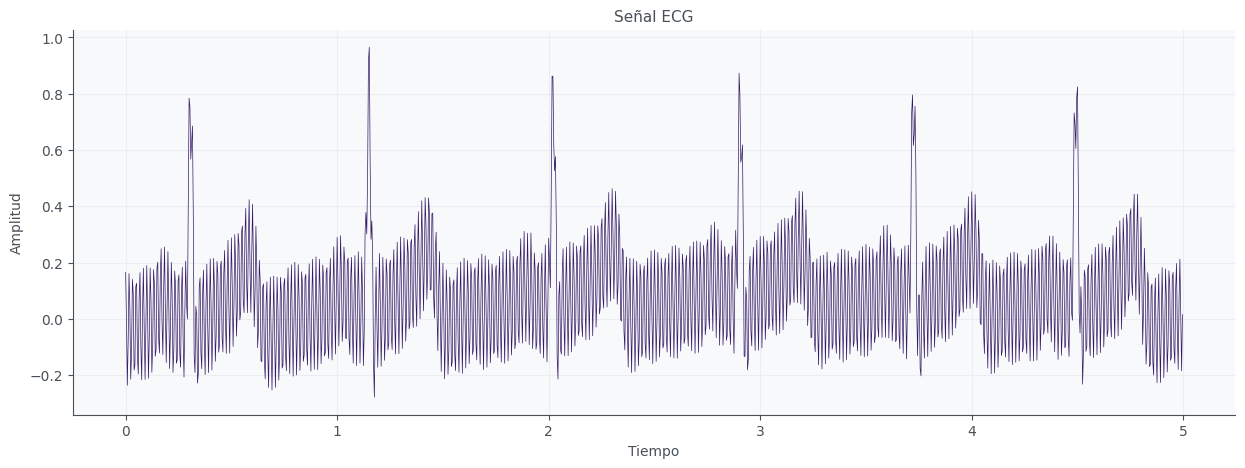

In [67]:
plt.figure(figsize=(15,5))
plt.plot(vector_tiempo,np.squeeze(ECG),linewidth=0.5,color=(0.2,0.1,0.4))
plt.title('Señal ECG')
plt.xlabel('Tiempo', fontsize=10)
plt.ylabel('Amplitud', fontsize=10)

In [68]:
ECGs=np.squeeze(ECG)
ECGs

array([ 0.16479384, -0.00455636, -0.23589197, ...,  0.00518452,
       -0.18447972,  0.015     ])

In [69]:
ECG

array([[ 0.16479384],
       [-0.00455636],
       [-0.23589197],
       ...,
       [ 0.00518452],
       [-0.18447972],
       [ 0.015     ]])

In [70]:
from scipy.signal import welch as pwelch

Se evidencia ruido electrico (60 Hz)

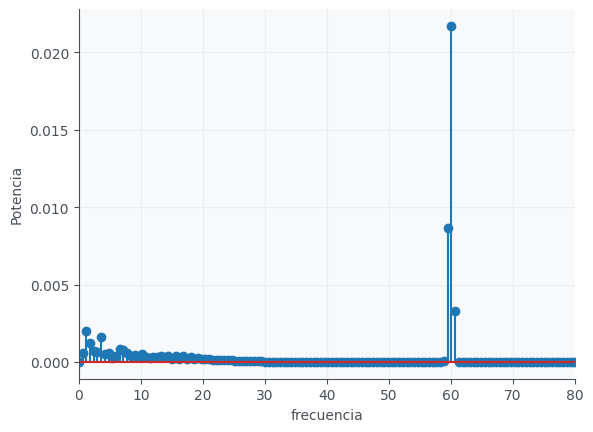

209
209


In [71]:
fs=250 # frecuencia de muestreo
nperseg=416 #ancho de la ventana
noverlap=int(nperseg/2) #solapamiento de las ventanas
f, Pxx=pwelch(ECGs[0:], fs,'hann', nperseg, noverlap)
#grafícamos frecuencia vs potencia
plt.stem(f, Pxx)
plt.xlabel('frecuencia')
plt.ylabel ('Potencia')
plt.xlim(0,80)
plt.show()
print(len(f))
print(len(Pxx))

La justificacion detras del tamaño (numero de muestras por segmento) de la ventana, yace en el hecho que entre mas grande sea esta, un menor numero de promedios se realizaran y por ende una mayor resolucion en frecuancia se obtendra, esto es algo de interes por encima a la propia eliminacion de ruido, ya que el filtrado se hara posteriormente, usando el metodo especificado en numerales anteriores, el solapamiento usado fue acorde al estandar de la libreria Scipy y la literatura, donde se establece que un solapamiento de 50% es razonable

Ubicacion de intervalo funcional para filtrado

<StemContainer object of 3 artists>

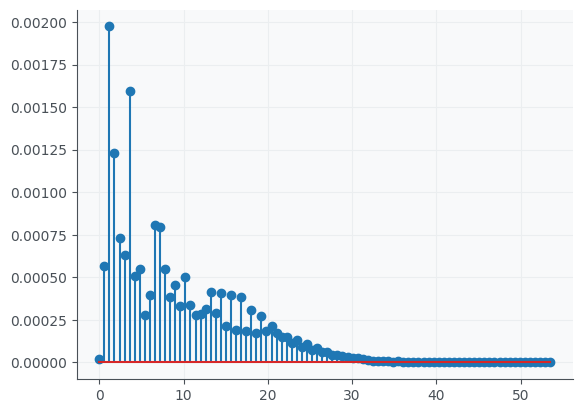

In [72]:
plt.stem(f[0:90],Pxx[0:90])

Aplicacion de Filtrado 

209


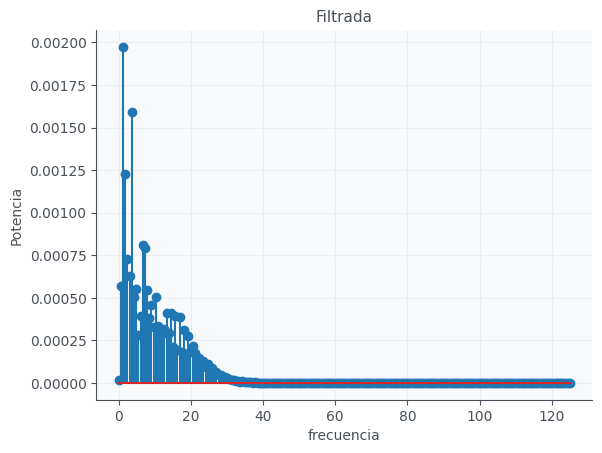

In [73]:
F1 = Pxx
F2 = np.zeros((len(F1)))
F2[0:90] = F1[0:90]
print(len(F2))
plt.stem(f, F2)
plt.xlabel('frecuencia')
plt.ylabel ('Potencia')
plt.title("Filtrada")
plt.show()


Numeral 4.6

In [74]:
import pandas as pd
import glob

# Get a list of all CSV files in a directory
mat_files_control = glob.glob(r'C:\Users\compu\Documents\bioseñales lab\proyecto3-parte2\datos_senales_datos_parkinson_cursos\control/*.mat')
mat_files_parkinson = glob.glob(r'C:\Users\compu\Documents\bioseñales lab\proyecto3-parte2\datos_senales_datos_parkinson_cursos\parkinson/*.mat')

print(mat_files_control[0])
print(mat_files_parkinson[0])

C:\Users\compu\Documents\bioseñales lab\proyecto3-parte2\datos_senales_datos_parkinson_cursos\control\C001R_EP_reposo.mat
C:\Users\compu\Documents\bioseñales lab\proyecto3-parte2\datos_senales_datos_parkinson_cursos\parkinson\P001_EP_reposo.mat


In [75]:
print(len(mat_files_control))
print(len(mat_files_parkinson))

36
23


In [76]:
import scipy.io
emptydict_parkinson={}
for i in range(len(mat_files_parkinson)):
    mat = scipy.io.loadmat(mat_files_parkinson[i])
    mat=mat["data"]
    emptydict_parkinson[i]=mat

In [77]:
import scipy.io
emptydict_control={}
for i in range(len(mat_files_control)):
    mat = scipy.io.loadmat(mat_files_control[i])
    mat=mat["data"]
    emptydict_control[i]=mat

In [78]:
data_control=emptydict_control[0]

In [79]:
senal_continua = np.reshape(data_control,(data_control.shape[0],data_control.shape[1]*data_control.shape[2]),order='F')
senal_continua.shape

(8, 360000)

Dimensiones de los datos cargados: (8, 360000)
(360000,)


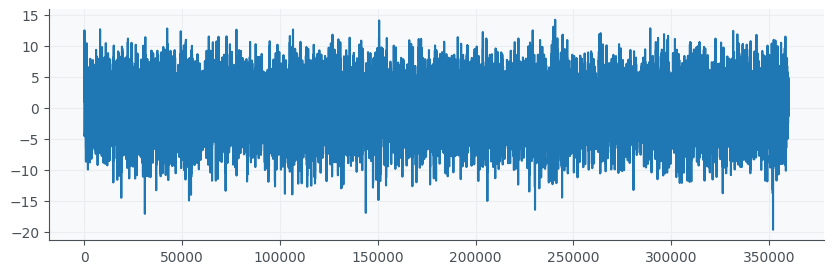

In [80]:
print("Dimensiones de los datos cargados: " + str(senal_continua.shape))
fig = plt.figure(figsize=(10,3))
#fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.plot(senal_continua[4,:])
print(np.squeeze(senal_continua[4,:]).shape)
plt.show()

In [81]:
data_park=emptydict_parkinson[0]

In [83]:
senal_continua2 = np.reshape(data_park,(data_park.shape[0],data_park.shape[1]*data_park.shape[2]),order='F')
senal_continua2.shape

(8, 286000)

Dimensiones de los datos cargados: (8, 286000)
(286000,)


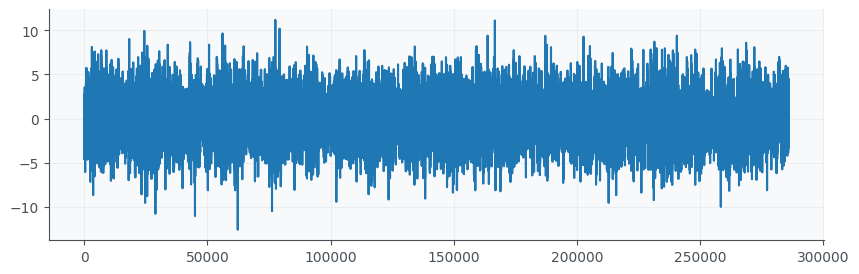

In [84]:
print("Dimensiones de los datos cargados: " + str(senal_continua2.shape))
fig = plt.figure(figsize=(10,3))
#fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.plot(senal_continua2[4,:])
print(np.squeeze(senal_continua2[4,:]).shape)
plt.show()

Se usara el canal 4 escojido al azar, ya que previamente no se encontro diferencias notables 

In [85]:
señal_control=np.squeeze(senal_continua2[4,:])
señal_parkinson=np.squeeze(senal_continua[4,:])

In [86]:
print(len(señal_control))
print(len(señal_parkinson))

286000
360000


Periodograma para control

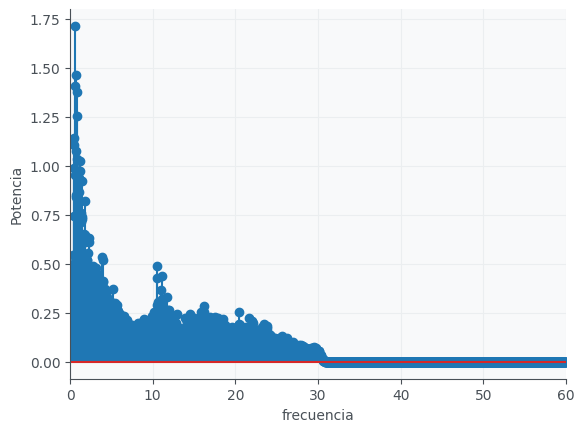

15001
15001


In [87]:
fs=1000 # frecuencia de muestreo
nperseg=30000 #ancho de la ventana
noverlap=int(nperseg/2) #solapamiento de las ventanas
f, Pxx=pwelch(señal_control, fs,'hann', nperseg, noverlap)
#grafícamos frecuencia vs potencia
plt.stem(f, Pxx)
plt.xlabel('frecuencia')
plt.ylabel ('Potencia')
plt.xlim(0,60)
plt.show()
print(len(f))
print(len(Pxx))

Periodograma Parkinson

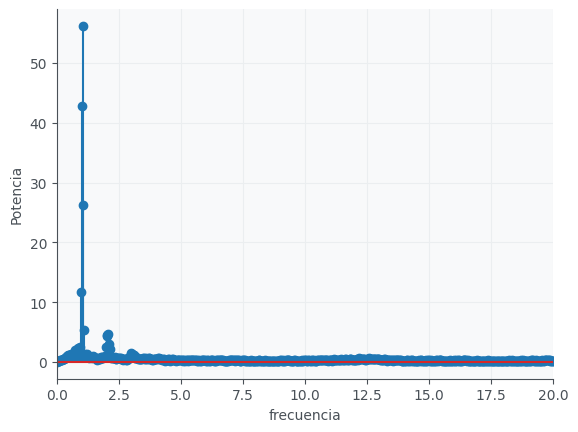

15001
15001


In [88]:
fs=1000 # frecuencia de muestreo
nperseg=30000 #ancho de la ventana
noverlap=int(nperseg/2) #solapamiento de las ventanas
f, Pxx=pwelch(señal_parkinson, fs,'hann', nperseg, noverlap)
#grafícamos frecuencia vs potencia
plt.stem(f, Pxx)
plt.xlabel('frecuencia')
plt.ylabel ('Potencia')
plt.xlim(0,20)
plt.show()
print(len(f))
print(len(Pxx))

La comparativa que se puede realizar a partir de los periodogramas se cimenta en dos hechos, primero, en la señal de control se observa la presencia de frecuencias mas altas en la señal, que van desde 0 hasta 30 Hz, en contraste con la señal de parkinson en donde los picos de potencia solo sobresalen hasta valores cercanos a 3 Hz; El segundo hecho a notar es que para la señal de parkinson, los picos de potencia alcanzan valores mucho mayores a los vistos en la señal de control, para el primer caso llegan hasta valores cercanos a magnitud de 50, mientras que para control llegan a una magnitud cercana a los 1.75 de potencia 

Conclusiones:
- El efecto de la frecuencia de muestreo en conjunto con la duracion temporal de la señal a la cual se le aplicara la FFT, determina la resolucion de frecuencias de esta, siendo mas precisos, la frecuencia de muestreo influye sobre la maxima frecuencia que se alcanzara a evidenciar, mientras la duracion temporal de la señal original influye sobre la minima frecuencia que se podra identificar 

- Al aplicar periodogramas, se observa un suavizado del espectro de frecuencias, al compararlo con el arrojado por la FFT, esto se intensifica o reduce acorde al tamaño de la ventana a emplear, ademas del solapamiento de las ventanas, entre menos elementos tenga la ventana utilizada, habra un mayor suavizado debido a un mayor numero de promedios aplicados a lo largo de la señal original


Bibliografia:

Osti.gov. [En línea]. Disponible en: https://www.osti.gov/biblio/5688766. [Consultado: 26-abr-2024].

M. Cerna y A. F. Harvey, “The fundamentals of FFT-based signal analysis and measurement”, Sjsu.edu. [En línea]. Disponible en: https://www.sjsu.edu/people/burford.furman/docs/me120/FFT_tutorial_NI.pdf. [Consultado: 26-abr-2024].
